# EXPLORATORY DATA ANALYSIS

IMPORTING THE LIBRARIES

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [24]:
d1=pd.read_csv('covid.csv')
d1.head()

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-05-21 02:32:54,32.3182,-86.9023,13052,522,NaN,12530.0,1,266.194321,164450.0,1493.0,3.999387,84000001,USA,3353.942386,11.438860
1,Alaska,US,2020-05-21 02:32:54,61.3707,-152.4044,401,10,352.0,39.0,2,54.815493,37045.0,NaN,2.493766,84000002,USA,5063.940017,NaN
2,American Samoa,US,2020-05-21 02:32:54,-14.2710,-170.1320,0,0,NaN,0.0,60,0.000000,124.0,NaN,NaN,16,ASM,222.857246,NaN
3,Arizona,US,2020-05-21 02:32:54,33.7298,-111.4312,14906,747,3773.0,10386.0,4,204.788838,165435.0,1792.0,5.011405,84000004,USA,2272.859351,12.022005
4,Arkansas,US,2020-05-21 02:32:54,34.9697,-92.3731,5003,107,3852.0,1044.0,5,165.782801,96258.0,535.0,2.138717,84000005,USA,3189.670370,10.693584


In [25]:
d1.shape

(58, 18)

#There are 58 rows and 18 columns in our dataset

In [26]:
d1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Province_State        58 non-null     object 
 1   Country_Region        58 non-null     object 
 2   Last_Update           58 non-null     object 
 3   Lat                   56 non-null     float64
 4   Long_                 56 non-null     float64
 5   Confirmed             58 non-null     int64  
 6   Deaths                58 non-null     int64  
 7   Recovered             42 non-null     float64
 8   Active                58 non-null     float64
 9   FIPS                  58 non-null     int64  
 10  Incident_Rate         56 non-null     float64
 11  People_Tested         56 non-null     float64
 12  People_Hospitalized   33 non-null     float64
 13  Mortality_Rate        57 non-null     float64
 14  UID                   58 non-null     int64  
 15  ISO3                  58 

In [27]:
#We can see that there are null values in our dataset
#There are float,integer and object datatypes

In [28]:
d1.drop('Country_Region',axis=1,inplace=True)
d1.drop('Last_Update',axis=1,inplace=True)
d1.drop('Lat',axis=1,inplace=True)
d1.drop('Long_',axis=1,inplace=True)
d1.drop('FIPS',axis=1,inplace=True)
d1.drop('UID',axis=1,inplace=True)
d1.drop('ISO3',axis=1,inplace=True)

#dropping unwanted columns from our dataset.Some columns have all same values and some others dont contribute much for our analysis

In [29]:
d1.shape

(58, 11)

In [30]:
d1.dtypes

Province_State           object
Confirmed                 int64
Deaths                    int64
Recovered               float64
Active                  float64
Incident_Rate           float64
People_Tested           float64
People_Hospitalized     float64
Mortality_Rate          float64
Testing_Rate            float64
Hospitalization_Rate    float64
dtype: object

In [31]:
#implying label encoder on class column to convert into integer
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
d1['Province_State']=le.fit_transform(d1['Province_State'])

In [32]:
d1.head()

,Province_State,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,Testing_Rate,Hospitalization_Rate
0,0,13052,522,NaN,12530.0,266.194321,164450.0,1493.0,3.999387,3353.942386,11.438860
1,1,401,10,352.0,39.0,54.815493,37045.0,NaN,2.493766,5063.940017,NaN
2,2,0,0,NaN,0.0,0.000000,124.0,NaN,NaN,222.857246,NaN
3,3,14906,747,3773.0,10386.0,204.788838,165435.0,1792.0,5.011405,2272.859351,12.022005
4,4,5003,107,3852.0,1044.0,165.782801,96258.0,535.0,2.138717,3189.670370,10.693584


In [33]:
d1.nunique()

Province_State          58
Confirmed               58
Deaths                  56
Recovered               42
Active                  58
Incident_Rate           56
People_Tested           56
People_Hospitalized     33
Mortality_Rate          57
Testing_Rate            56
Hospitalization_Rate    33
dtype: int64

In [34]:
#checking the number of null values
d1.isnull().sum()

Province_State           0
Confirmed                0
Deaths                   0
Recovered               16
Active                   0
Incident_Rate            2
People_Tested            2
People_Hospitalized     25
Mortality_Rate           1
Testing_Rate             2
Hospitalization_Rate    25
dtype: int64

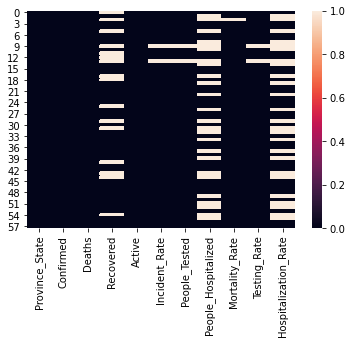

In [35]:
#presence of null values can be checked in visual method using heatmap
sns.heatmap(d1.isnull())

#The white lines in the heatmap represents null values

In [36]:
d1["Recovered"]=d1["Recovered"].fillna(d1["Recovered"].mean())
d1["Incident_Rate"]=d1["Incident_Rate"].fillna(d1["Incident_Rate"].mean())
d1["People_Tested"]=d1["People_Tested"].fillna(d1["People_Tested"].mean())
d1["People_Hospitalized"]=d1["People_Hospitalized"].fillna(d1["People_Hospitalized"].mean())
d1["Mortality_Rate"]=d1["Mortality_Rate"].fillna(d1["Mortality_Rate"].mean())
d1["Testing_Rate"]=d1["Testing_Rate"].fillna(d1["Testing_Rate"].mean())
d1["Hospitalization_Rate"]=d1["Hospitalization_Rate"].fillna(d1["Hospitalization_Rate"].mean())

#Since our dataset is too small we cant remove rows with null values,it may lead to huge data loss.So we are filling null values with the mean of that column

In [37]:
d1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Province_State        58 non-null     int32  
 1   Confirmed             58 non-null     int64  
 2   Deaths                58 non-null     int64  
 3   Recovered             58 non-null     float64
 4   Active                58 non-null     float64
 5   Incident_Rate         58 non-null     float64
 6   People_Tested         58 non-null     float64
 7   People_Hospitalized   58 non-null     float64
 8   Mortality_Rate        58 non-null     float64
 9   Testing_Rate          58 non-null     float64
 10  Hospitalization_Rate  58 non-null     float64
dtypes: float64(8), int32(1), int64(2)
memory usage: 4.9 KB


In [38]:
d1.describe()

,Province_State,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,Testing_Rate,Hospitalization_Rate
count,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,5.800000e+01,58.000000,58.000000,58.000000,58.000000
mean,28.500000,26756.086207,1611.017241,7007.428571,20070.724138,396.230806,2.258534e+05,4897.454545,4.458248,3894.186870,14.342541
std,16.886879,52562.031122,4084.750891,9901.304545,41294.705318,395.554852,2.934948e+05,9879.577790,2.116191,1898.951207,3.781861
min,0.000000,0.000000,0.000000,13.000000,0.000000,0.000000,1.240000e+02,65.000000,0.000000,97.702058,6.778043
25%,14.250000,2596.000000,74.000000,1281.750000,812.500000,154.909239,4.745000e+04,1454.500000,3.116158,2741.843521,12.829963
50%,28.500000,10148.500000,385.000000,4987.000000,5644.500000,259.009335,1.433085e+05,4897.454545,4.409323,3501.526835,14.342541
75%,42.750000,29395.500000,1394.250000,7007.428571,19291.250000,462.828082,2.646656e+05,4897.454545,5.450908,4622.586404,15.552021
max,57.000000,354370.000000,28636.000000,61886.000000,263848.000000,1821.620216,1.505836e+06,76410.000000,9.545549,11377.424693,28.054438


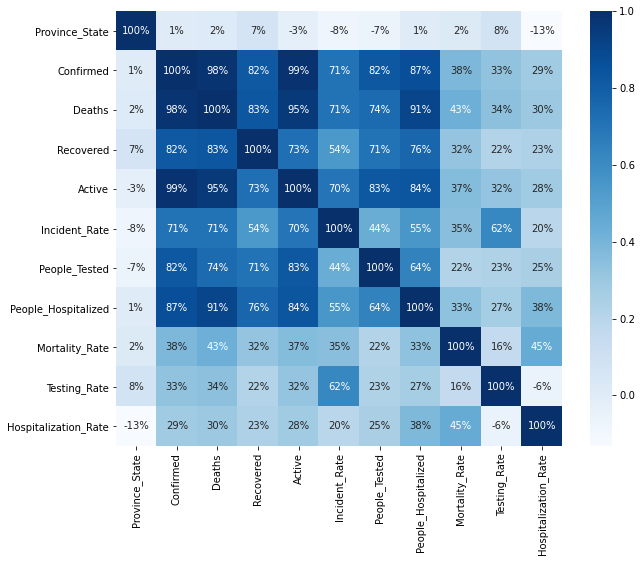

In [40]:
d1cor=d1.corr()
plt.figure(figsize=(10,8))
sns.heatmap(d1cor,cmap='Blues',annot=True,fmt='.0%')
plt.show()

In [41]:
#Matrix representation of correlation of death with other columns
corr_matrix=d1.corr()
print(corr_matrix["Deaths"].sort_values(ascending=False))

Deaths                  1.000000
Confirmed               0.982191
Active                  0.954378
People_Hospitalized     0.908279
Recovered               0.830223
People_Tested           0.739634
Incident_Rate           0.710105
Mortality_Rate          0.427127
Testing_Rate            0.344465
Hospitalization_Rate    0.298225
Province_State          0.015229
Name: Deaths, dtype: float64


In [45]:
collist=d1.columns.values
ncol=20
nrows=7

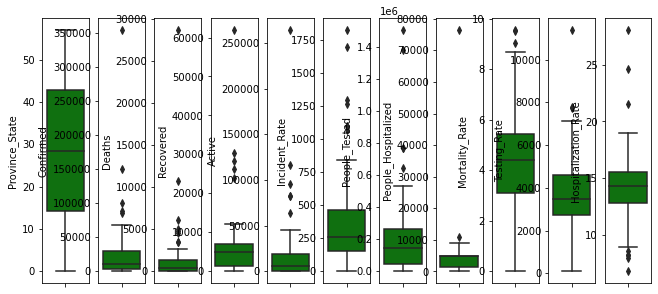

In [46]:
plt.figure(figsize=(ncol,2*ncol))
for i in range (0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(d1[collist[i]],color='green',orient='v')

#black dots in the boxplot represents presence of outliers

# UNIVARIATE ANALYSIS

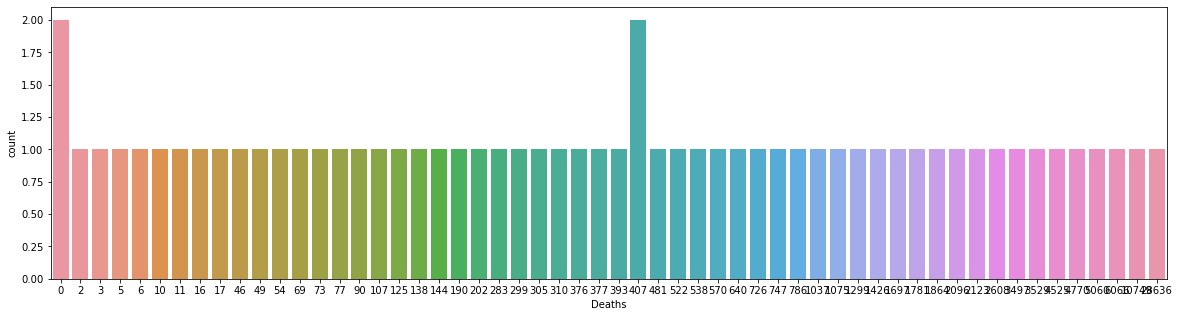

In [49]:
plt.subplots(figsize=(20,5))
sns.countplot(d1["Deaths"])

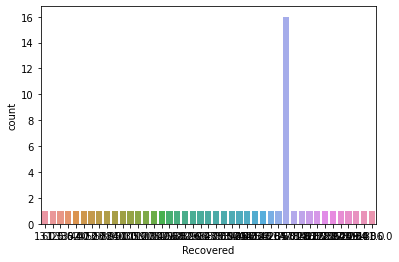

In [51]:
sns.countplot(d1['Recovered'])

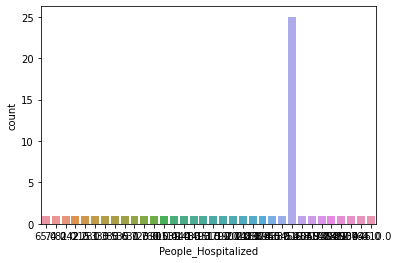

In [52]:
sns.countplot(d1['People_Hospitalized'])

# BIVARIATE ANALYSIS

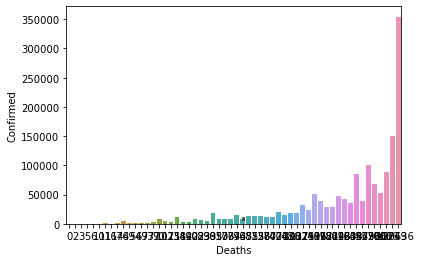

In [59]:
sns.barplot(x=d1['Deaths'],y=d1['Confirmed'])

#We can see that deaths and confirmed cases are directly correlated.AS confirmedd cases increases,death rate also increases

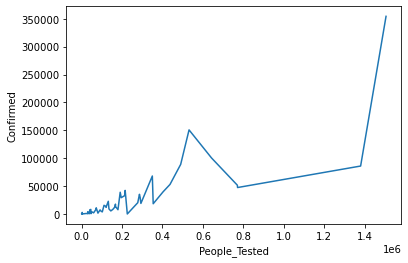

In [60]:
f, ax=plt.subplots(figsize=(6,4))
sns.lineplot(x='People_Tested', y='Confirmed',data=d1)

#as number of people tested increases confirmed cases also increases,after a ccertain range we can see a rapid increase in confirmed cases

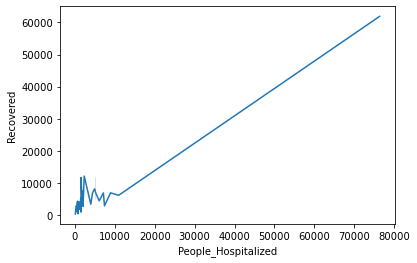

In [61]:
f, ax=plt.subplots(figsize=(6,4))
sns.lineplot(x='People_Hospitalized', y='Recovered',data=d1)

#After this wide spread of virus,number of people gets hospitalised increases also we can see that number of people got recovered is also rising .

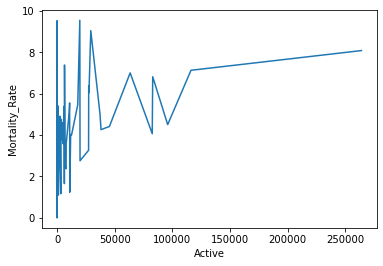

In [62]:
f, ax=plt.subplots(figsize=(6,4))
sns.lineplot(x='Active', y='Mortality_Rate',data=d1)

#In the few days there was high mortality rate than active cases.But after a certain point we can see thatmortality rate has no rapid rise

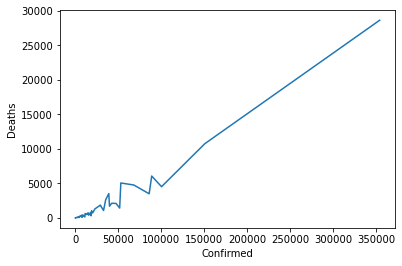

In [63]:
f, ax=plt.subplots(figsize=(6,4))
sns.lineplot(x='Confirmed', y='Deaths',data=d1)

#confirmed cases and death rate is linearly proportional to each other.Both increases rapidly

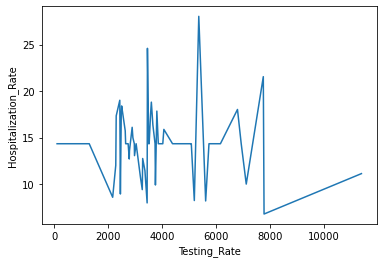

In [64]:
f, ax=plt.subplots(figsize=(6,4))
sns.lineplot(x='Testing_Rate', y='Hospitalization_Rate',data=d1)

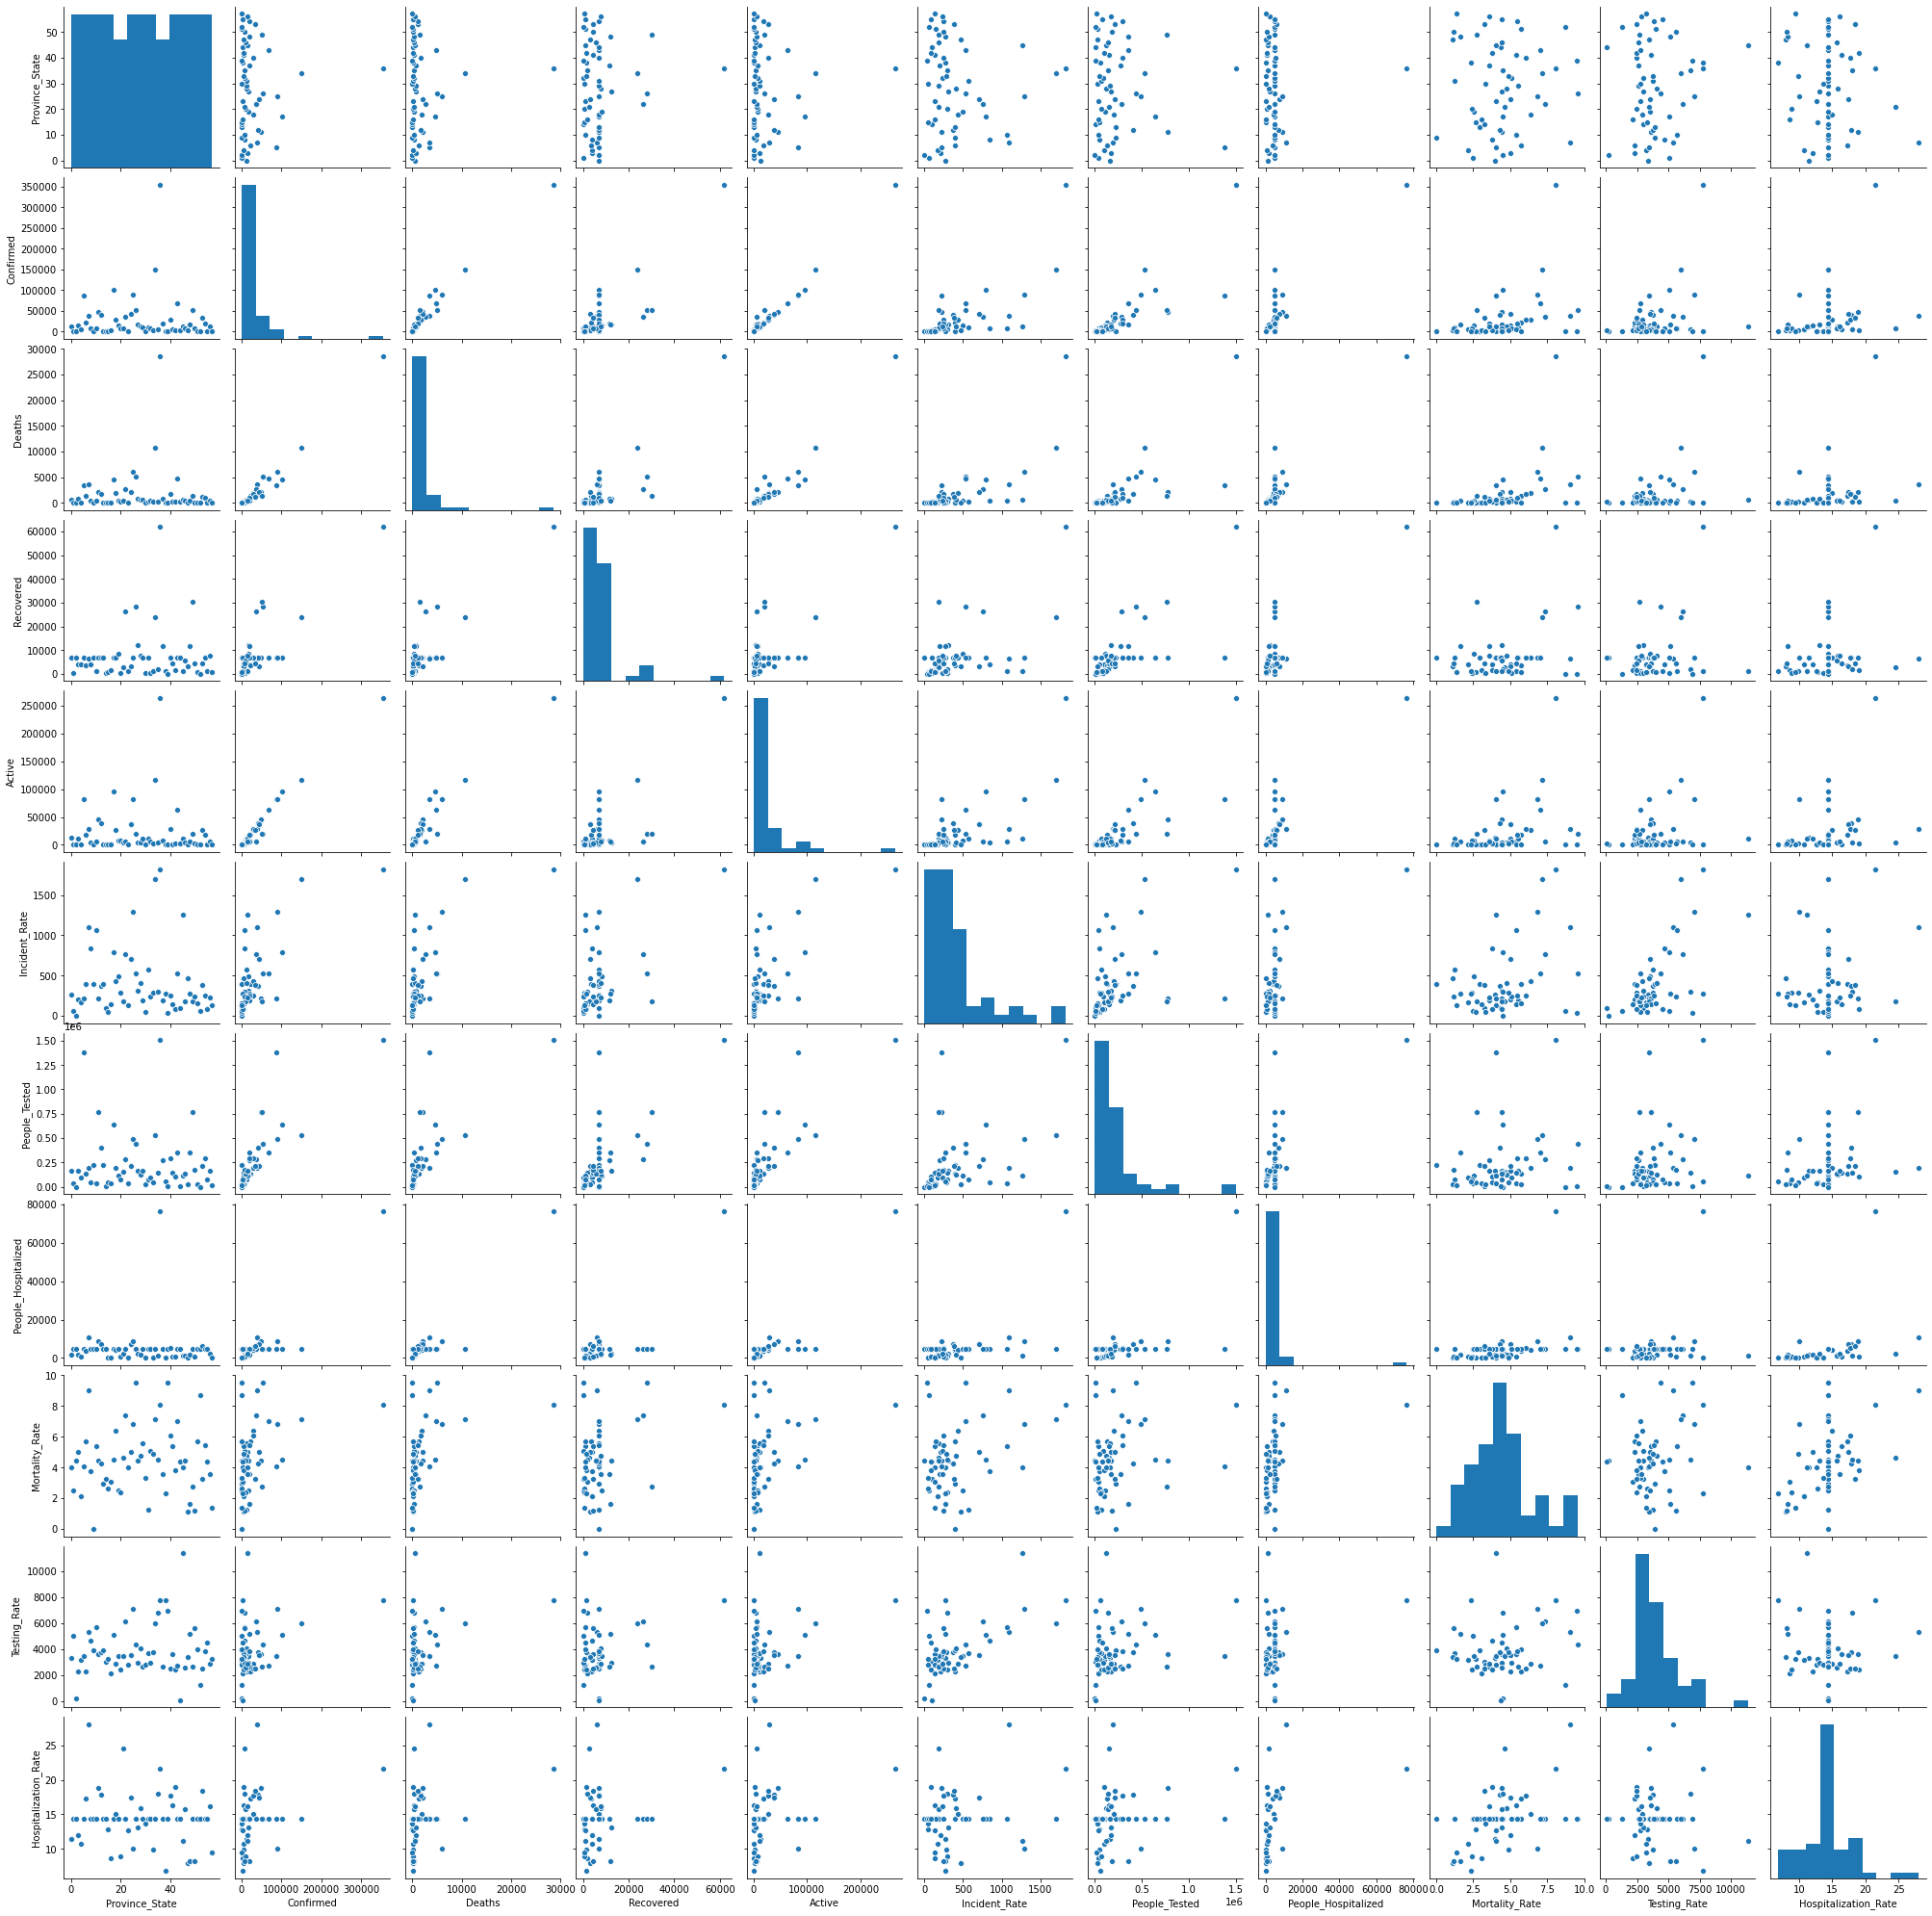

In [67]:
sns.pairplot(d1)

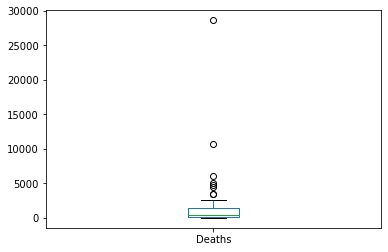

In [68]:
d1["Deaths"].plot.box()

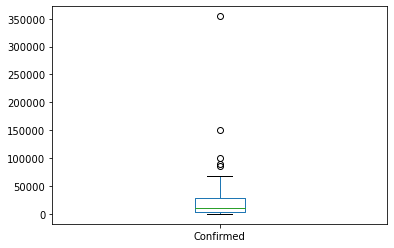

In [69]:
d1["Confirmed"].plot.box()

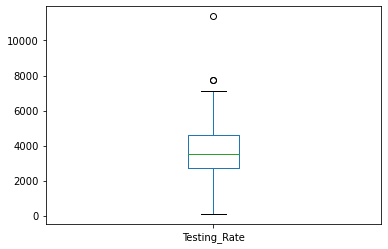

In [70]:
d1["Testing_Rate"].plot.box()

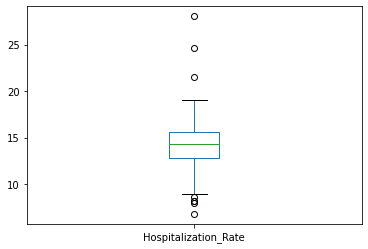

In [71]:
d1["Hospitalization_Rate"].plot.box()

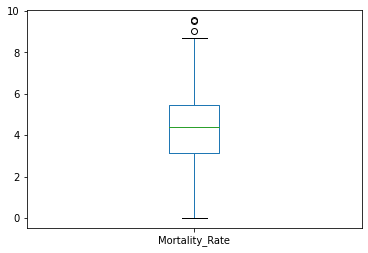

In [72]:
d1["Mortality_Rate"].plot.box()

In [73]:
#Checking the skewness
d1.skew()

Province_State          0.000000
Confirmed               4.708614
Deaths                  5.489201
Recovered               3.647693
Active                  4.180953
Incident_Rate           1.988351
People_Tested           2.829700
People_Hospitalized     6.869437
Mortality_Rate          0.496115
Testing_Rate            1.313407
Hospitalization_Rate    0.867341
dtype: float64

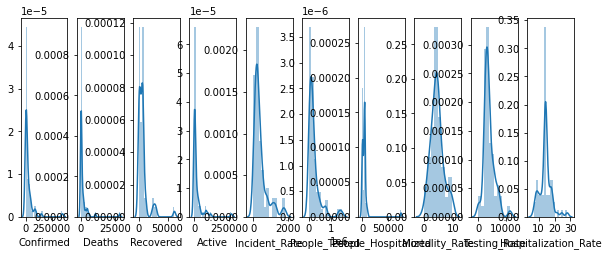

In [74]:
plt.figure(figsize=(20,30))
for i in range(1,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(d1[collist[i]])

In [75]:
#skewness can be removed using yeo_johnson method
from sklearn.preprocessing import power_transform
d1=pd.DataFrame(power_transform(d1,method='yeo-johnson'),columns=d1.columns)
d1.skew()

Province_State         -0.269845
Confirmed              -0.033709
Deaths                 -0.029293
Recovered               0.012263
Active                 -0.089886
Incident_Rate           0.088480
People_Tested           0.019084
People_Hospitalized     0.102236
Mortality_Rate          0.009702
Testing_Rate            0.224978
Hospitalization_Rate    0.023823
dtype: float64

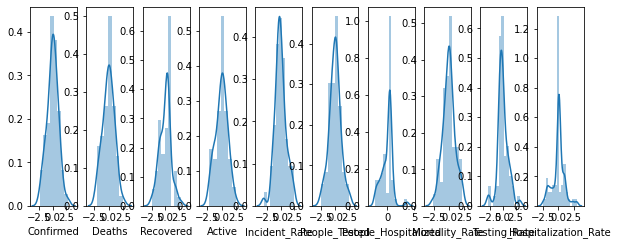

In [76]:
#skewness graph after removal of skewness
plt.figure(figsize=(20,30))
for i in range(1,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(d1[collist[i]])

In [78]:
#Implementing Zscore to remove the presence of outliers
from scipy.stats import zscore
columns=['Province_State', 'Confirmed','Recovered', 'Active',
       'Incident_Rate', 'People_Tested', 'People_Hospitalized',
       'Mortality_Rate', 'Testing_Rate', 'Hospitalization_Rate']
for i in range(len(columns)):
    d1[columns[i]]=zscore(d1[columns[i]])
    for j in range(len(d1[columns[i]])):
        if d1[columns[i]][j]>3 or d1[columns[i]][j]<-3:
            d1[columns[i]].replace(d1[columns[i]][j],d1[columns[i]].median(),inplace=True)
            d1[columns[i]]=np.cbrt((d1[columns[i]]))

In [79]:
#Assigning x and y values to train the data
x=d1[columns]
y=d1[["Deaths"]]

In [80]:
#Checking the shape of assigned x and y
print(x.shape)
print(y.shape)

(58, 10)
(58, 1)


In [81]:
#Checking whether any null values are present
d1.isnull().values.any()

False

In [82]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)
x

array([[-2.01911732e+00,  1.81938921e-01,  4.60676902e-01,
         4.54913674e-01, -4.29115385e-01,  1.68217099e-01,
        -1.02353727e+00, -1.43499004e-01, -5.60502651e-01,
        -7.55622949e-01],
       [-1.88815112e+00, -1.26387261e+00, -1.41146705e+00,
        -1.47276164e+00, -1.23653714e+00, -8.23561666e-01,
         7.63160248e-01, -9.26451262e-01,  1.22833867e+00,
         8.46629016e-02],
       [-1.77514253e+00, -2.35586783e+00,  4.60676902e-01,
        -2.07500386e+00, -4.83613333e-01, -2.50184999e+00,
         7.63160248e-01,  7.62276941e-02, -1.53789260e+00,
         8.46629016e-02],
       [-1.67241482e+00,  2.57181737e-01, -2.91782901e-02,
         3.62554419e-01, -7.43922616e-01,  1.72973127e-01,
        -9.29954560e-01,  3.31894162e-01, -1.00281661e+00,
        -5.76624045e-01],
       [-1.57671221e+00, -3.10800524e-01, -1.37948570e-02,
        -5.81524952e-01, -8.77989827e-01, -2.30937473e-01,
        -1.32907497e+00, -1.12893954e+00, -6.57378649e-01,
        -9.

# PCA AND MODEL SELECTION

In [83]:
from sklearn.decomposition import PCA
c=6
pca=PCA(n_components=c)
x=pca.fit_transform(x)
x.shape

(58, 6)

pca is done to remove multicollinearity.Multicollinearity means the feature columns of a dataset shows high correlation with each other.This may affect our model prediction accuracy and also the result.So PCA is done to resolve this problem

In [84]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split

In [85]:
max_r_score=0
for r_state in range(30,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.22)
    regr=linear_model.LinearRegression()
    regr.fit(x_train,y_train)
    y_pred=regr.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
print("max r2 score corresponding to",final_r_state,"is",max_r_score)

max r2 score corresponding to 44 is 0.9924670770981541


In [86]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=44)

In [87]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(45, 6)
(13, 6)
(45, 1)
(13, 1)


In [88]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn .linear_model import Lasso,Ridge, ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

In [89]:
model=[LinearRegression(),DecisionTreeRegressor(),KNeighborsRegressor(),SVR(),Lasso(),Ridge(),ElasticNet()]
for m in model:
    m.fit(x_train,y_train)
    print('score of',m,'is:',m.score(x_train,y_train))
    predm=m.predict(x_test)
    print('Error:')
    print('Mean absolute error:',mean_absolute_error(y_test,predm))
    print('Mean squared error:',mean_squared_error(y_test,predm))
    print('Root mean squared error:',np.sqrt(mean_squared_error(y_test,predm)))
    print("r2_score:",r2_score(y_test,predm))
    print('******************************************************************************')
    print('\n')

score of LinearRegression() is: 0.9687739755325009
Error:
Mean absolute error: 0.05951773580976703
Mean squared error: 0.0061236280261651585
Root mean squared error: 0.078253613502286
r2_score: 0.9924670770981541
******************************************************************************


score of DecisionTreeRegressor() is: 1.0
Error:
Mean absolute error: 0.30866947307526316
Mean squared error: 0.1388354770100478
Root mean squared error: 0.37260632980405445
r2_score: 0.8292128555344935
******************************************************************************


score of KNeighborsRegressor() is: 0.8502750983832306
Error:
Mean absolute error: 0.2835370741232053
Mean squared error: 0.10503679468888727
Root mean squared error: 0.3240938053849337
r2_score: 0.8707899838351372
******************************************************************************


score of SVR() is: 0.9282725151738116
Error:
Mean absolute error: 0.21442340872909724
Mean squared error: 0.08606769489451381
Ro

In [90]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=1000,random_state=44)
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print('mean absolute error:',mean_absolute_error(y_test,predrf))
print('mean squared error:',mean_squared_error(y_test,predrf))
print('root mean squared error:',np.sqrt(mean_squared_error(y_test,predrf)))
print(r2_score(y_test,predrf))

mean absolute error: 0.16500092370611252
mean squared error: 0.04748281611936192
root mean squared error: 0.21790552108508385
0.9415894643728588


In [91]:
from sklearn.ensemble import AdaBoostRegressor
ad=AdaBoostRegressor()
ad.fit(x_train,y_train)
ad_pred=ad.predict(x_test)
print('mean absolute error:',mean_absolute_error(y_test,ad_pred))
print('mean squared error:',mean_squared_error(y_test,ad_pred))
print('root mean squared error:',np.sqrt(mean_squared_error(y_test,ad_pred)))
print(r2_score(y_test,ad_pred))

mean absolute error: 0.16384925963640365
mean squared error: 0.037537721486049586
root mean squared error: 0.19374653928793048
0.9538233281549505


#Linear regression is giving a maximum r2_score of 0.99.Therefore checking its cross_val_score

In [92]:
from sklearn.model_selection import cross_val_score
lr=LinearRegression()
lrscores=cross_val_score(lr,x,y,cv=5)
print(lrscores)
print(lrscores.mean(),lrscores.std())

[0.96244413 0.95518422 0.99043724 0.95883706 0.94277306]
0.9619351429559677 0.01571614931698879


In [93]:
#selecting Linear Regression as best model and saving it as pickle file
import joblib
joblib.dump(lr,'lr_covid.pkl')

['lr_covid.pkl']